In [1]:
#govhack Geelong 2015

In [2]:
!wget http://data.gov.au/api/3/action/tag_list

--2015-07-03 23:22:11--  http://data.gov.au/api/3/action/tag_list
Resolving data.gov.au (data.gov.au)... 54.252.191.23
Connecting to data.gov.au (data.gov.au)|54.252.191.23|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/json]
Saving to: 'tag_list’

    [ <=>                                   ] 117,518     --.-K/s   in 0.1s    

2015-07-03 23:22:12 (833 KB/s) - 'tag_list’ saved [117518]



In [3]:
#move the tag_list file to metadata
!mv tag_list ../metadata_dataset/original_data/


In [4]:
import json, urllib2
import pandas as pd

In [ ]:
!head ../metadata_dataset/original_data/

In [6]:
tags = pd.read_json('../metadata_dataset/original_data/tag_list')

In [7]:
tags.head()

help            result success
0  http://data.gov.au/api/3/action/help_show?name...              1001    True
1  http://data.gov.au/api/3/action/help_show?name...        100k scale    True
2  http://data.gov.au/api/3/action/help_show?name...        100K scale    True
3  http://data.gov.au/api/3/action/help_show?name...  100K unpublished    True
4  http://data.gov.au/api/3/action/help_show?name...            1345.0    True

In [10]:
tags.ix[2].help #help and success columns are useless jere

u'http://data.gov.au/api/3/action/help_show?name=tag_list'

In [11]:
#do the same for packages
!wget http://data.gov.au/api/3/action/package_list
packages = pd.read_json('package_list')

--2015-07-03 23:28:19--  http://data.gov.au/api/3/action/package_list
Resolving data.gov.au (data.gov.au)... 54.252.191.23
Connecting to data.gov.au (data.gov.au)|54.252.191.23|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/json]
Saving to: 'package_list’

    [  <=>                                  ] 406,967     1.04MB/s   in 0.4s   

2015-07-03 23:28:20 (1.04 MB/s) - 'package_list’ saved [406967]



In [12]:
packages.head()

help  \
0  http://data.gov.au/api/3/action/help_show?name...   
1  http://data.gov.au/api/3/action/help_show?name...   
2  http://data.gov.au/api/3/action/help_show?name...   
3  http://data.gov.au/api/3/action/help_show?name...   
4  http://data.gov.au/api/3/action/help_show?name...   

                                              result success  
0  10-year-trend-of-levels-of-organochlorine-poll...    True  
1  1-1-000-000-scale-australian-geoscience-map-sh...    True  
2  1-100-000-scale-australian-geoscience-map-shee...    True  
3  1-250-000-scale-australian-geoscience-map-shee...    True  
4   19th-century-photographs-by-captain-samuel-sweet    True

In [14]:
ls

govhack15_1.ipynb  package_list


In [15]:
#packages and metadata download was done on Thursday

In [16]:
package_meta = pd.read_csv('../metadata_dataset/original_data/datagovau.metadata.txt',sep="\t", names=['id','json_content'])

In [17]:
package_meta.shape

(6866, 2)

In [18]:
package_meta.head() #use the json in each cell to make columns

id  \
0  10-year-trend-of-levels-of-organochlorine-poll...   
1  1-1-000-000-scale-australian-geoscience-map-sh...   
2  1-100-000-scale-australian-geoscience-map-shee...   
3  1-250-000-scale-australian-geoscience-map-shee...   
4   19th-century-photographs-by-captain-samuel-sweet   

                                        json_content  
0  {"help": "http://data.gov.au/api/3/action/help...  
1  {"help": "http://data.gov.au/api/3/action/help...  
2  {"help": "http://data.gov.au/api/3/action/help...  
3  {"help": "http://data.gov.au/api/3/action/help...  
4  {"help": "http://data.gov.au/api/3/action/help...

In [19]:
#plan
"""
for each row
    get json
    convert to df
    convert to dict to make a list of dicts
    
list of dicts -> df

"""

'\nfor each row\n    get json\n    convert to df\n    convert to dict to make a list of dicts\n    \nlist of dicts -> df\n\n'

In [20]:
list_of_dicts = []
i = 0
for id,json_content in zip(package_meta.id, package_meta.json_content):
    df_json = pd.read_json(json_content)
    temp_dict = df_json.T.ix[1].to_dict() #second row contains data (first is just urls_
    temp_dict['id'] = id
    list_of_dicts.append(temp_dict.copy())
    del(temp_dict)
    i = i + 1
    if i ==10:
        break

In [23]:
import sys  
reload(sys)  
sys.setdefaultencoding('utf8')
pd.DataFrame(list_of_dicts).head()

In [24]:
pd.DataFrame(list_of_dicts).head()

author      author_email        contact_point  \
0                              None              None  metadata@aad.gov.au   
1                              None              None      sales@ga.gov.au   
2                              None              None      sales@ga.gov.au   
3                              None              None      sales@ga.gov.au   
4  State Library of South Australia  datasa@sa.gov.au     DataSA@sa.gov.au   

                        creator_user_id data_state  \
0  de0ba262-83fe-45e2-adda-41bb9f0c86d8   inactive   
1  de0ba262-83fe-45e2-adda-41bb9f0c86d8   inactive   
2  de0ba262-83fe-45e2-adda-41bb9f0c86d8   inactive   
3  de0ba262-83fe-45e2-adda-41bb9f0c86d8   inactive   
4  91af4eef-efb1-4e4e-87f2-171d81977ae0     Active   

                                              extras field_of_research  \
0  [{u'value': u'["\n            These data are p...                []   
1  [{u'value': u'["license", "Creative Commons At...                []   
2  [{u'value': u'["license", "Creative Commons At...                []   
3  [{u'value': u'["license", "Creative Commons At...                []   
4  [{u'value': u'N/A', u'key': u'data_granularity...                []   

  geospatial_topic groups                     harvest_object_id   ...    \
0               []     []  4879ec82-c156-4076-9228-d79893b130d8   ...     
1               []     []  ba14d7bb-584d-4bc3-8322-af5ecbf2f149   ...     
2               []     []  ae8b018b-8e4c-4d6f-b5c1-3dab9ca759cd   ...     
3               []     []  d9a87f8a-0bd2-489b-9b68-acfcb334041e   ...     
4               []     []  b9b77820-c57c-4419-98eb-c71d26155884   ...     

  spatial_harvester   state  \
0              true  active   
1              true  active   
2              true  active   
3              true  active   
4               NaN  active   

                                                tags temporal_coverage_from  \
0  [{u'vocabulary_id': None, u'state': u'active',...                    NaN   
1  [{u'vocabulary_id': None, u'state': u'active',...                    NaN   
2  [{u'vocabulary_id': None, u'state': u'active',...                    NaN   
3  [{u'vocabulary_id': None, u'state': u'active',...                    NaN   
4  [{u'vocabulary_id': None, u'state': u'active',...              1865-1902   

                                               title  \
0  10 year trend of levels of organochlorine poll...   
1  1:1 000 000 Scale Australian Geoscience Map Sh...   
2  1:100 000 Scale Australian Geoscience Map Shee...   
3  1:250 000 Scale Australian Geoscience Map Shee...   
4   19th Century Photographs by Captain Samuel Sweet   

               tracking_summary     type update_freq  \
0  {u'total': 13, u'recent': 2}  dataset         NaN   
1  {u'total': 48, u'recent': 1}  dataset    asNeeded   
2  {u'total': 36, u'recent': 3}  dataset    asNeeded   
3  {u'total': 56, u'recent': 1}  dataset    asNeeded   
4   {u'total': 0, u'recent': 0}  dataset    Once off   

                                                 url version  
0                                               None    None  
1  http://www.ga.gov.au/metadata-gateway/metadata...    None  
2  http://www.ga.gov.au/metadata-gateway/metadata...    None  
3  http://www.ga.gov.au/metadata-gateway/metadata...    None  
4                                               None    None  

[5 rows x 45 columns]

In [25]:
list_of_dicts = []
i = 0
for id,json_content in zip(package_meta.id, package_meta.json_content):
    df_json = pd.read_json(json_content)
    temp_dict = df_json.T.ix[1].to_dict()
    temp_dict['id'] = id #package name
    list_of_dicts.append(temp_dict.copy())
    del(temp_dict)
    i = i + 1

In [26]:
package_meta_table = pd.DataFrame(list_of_dicts)

In [27]:
package_meta_table.shape

(6866, 57)

In [28]:
!mkdir ../metadata_dataset/data


In [29]:
package_meta_table.to_csv('../metadata_dataset/data/package_meta_table.csv')

In [30]:
pmt = package_meta_table

In [33]:
#create another table with the following format
#index_int, id(package name),tags list for that entry 

In [35]:
pmt.ix[0].tags #tags exist as a list of dicts

[{u'display_name': u'AMD',
  u'id': u'dba7c99d-b0de-4b01-b166-360aff9b5053',
  u'name': u'AMD',
  u'state': u'active',
  u'vocabulary_id': None},
 {u'display_name': u'AMD/AU',
  u'id': u'3ea7b640-ce0e-4158-9ae0-c1b4c3467b7c',
  u'name': u'AMD/AU',
  u'state': u'active',
  u'vocabulary_id': None},
 {u'display_name': u'ANTARCTICA',
  u'id': u'9efe6be6-0838-4c37-84e3-f2a1345e3e92',
  u'name': u'ANTARCTICA',
  u'state': u'active',
  u'vocabulary_id': None},
 {u'display_name': u'Adelie penguin',
  u'id': u'c5a729a1-8879-4745-83f0-9a520c3bee49',
  u'name': u'Adelie penguin',
  u'state': u'active',
  u'vocabulary_id': None},
 {u'display_name': u'CEOS',
  u'id': u'14765c9b-bc4c-4a36-a3a8-5bc635b910a9',
  u'name': u'CEOS',
  u'state': u'active',
  u'vocabulary_id': None},
 {u'display_name': u'CONTINENT > ANTARCTICA > Rauer Islands',
  u'id': u'a3b2d7de-5643-4998-9b4a-4da9d625d3f8',
  u'name': u'CONTINENT > ANTARCTICA > Rauer Islands',
  u'state': u'active',
  u'vocabulary_id': None},
 {u'displa

In [40]:
t1 = pmt.ix[0].tags
t2 = pd.DataFrame(t1)


In [39]:
t2.head() #great, not sure what the id column here though

display_name                                    id            name  \
0             AMD  dba7c99d-b0de-4b01-b166-360aff9b5053             AMD   
1          AMD/AU  3ea7b640-ce0e-4158-9ae0-c1b4c3467b7c          AMD/AU   
2      ANTARCTICA  9efe6be6-0838-4c37-84e3-f2a1345e3e92      ANTARCTICA   
3  Adelie penguin  c5a729a1-8879-4745-83f0-9a520c3bee49  Adelie penguin   
4            CEOS  14765c9b-bc4c-4a36-a3a8-5bc635b910a9            CEOS   

    state vocabulary_id  
0  active          None  
1  active          None  
2  active          None  
3  active          None  
4  active          None

In [42]:
list(t2.display_name)

[u'AMD',
 u'AMD/AU',
 u'ANTARCTICA',
 u'Adelie penguin',
 u'CEOS',
 u'CONTINENT > ANTARCTICA > Rauer Islands',
 u'DDE',
 u'EARTH SCIENCE > BIOLOGICAL CLASSIFICATION > ANIMAL',
 u'EARTH SCIENCE > BIOSPHERE > ECOLOGICAL DYNAMICS >',
 u'EARTH SCIENCE > HUMAN DIMENSIONS > ENVIRONMENTAL I',
 u'FIELD INVESTIGATION',
 u'Fulmarus glacialoides',
 u'GAS CHROMATOGRAPHS',
 u'GEOGRAPHIC REGION > POLAR',
 u'HCB',
 u'LABORATORY',
 u'OCEAN > SOUTHERN OCEAN',
 u'ORGANOCHLORINES',
 u'PCB',
 u'Pygoscelis adeliae',
 u'SEABIRDS',
 u'dieldrin',
 u'fulmar',
 u'hexachlorobenzene',
 u'morphometrics',
 u'polychlorinated biphenyls',
 u'preenoil']

In [43]:
#revised table
#index_int, id(package name),display_name_list, display_list

In [46]:
pmt.ix[0].id

'10-year-trend-of-levels-of-organochlorine-pollutants-in-antarctic-seabirds'

In [75]:

list_of_dicts = []
x = 0
for id, tag_data in zip(pmt.id, pmt.tags):
    if len(tag_data) == 0:
        tag_df = pd.DataFrame(tag_data)
        temp_dict= {}
        temp_dict['id'] = id
        temp_dict['tag_data'] = []
        temp_dict['tag_display_name_list'] = []
        temp_dict['tag_name_list'] = []
        temp_dict['tag_id_list'] = []
        list_of_dicts.append(temp_dict.copy())
    else:
        tag_df = pd.DataFrame(tag_data)
        temp_dict= {}
        temp_dict['id'] = id
        temp_dict['tag_data'] = list(tag_data)
        temp_dict['tag_display_name_list'] = list(tag_df.display_name)
        temp_dict['tag_name_list'] = list(tag_df.name)
        temp_dict['tag_id_list'] = list(tag_df.id)
        list_of_dicts.append(temp_dict.copy())
    del(temp_dict)
    del(tag_df)
    x = x + 1
    if x ==505:
        break

In [68]:
t1 = pd.DataFrame(list_of_dicts)

In [70]:
pmt[5:10].tags

5    [{u'vocabulary_id': None, u'state': u'active',...
6    [{u'vocabulary_id': None, u'state': u'active',...
7    [{u'vocabulary_id': None, u'state': u'active',...
8    [{u'vocabulary_id': None, u'state': u'active',...
9                                                   []
Name: tags, dtype: object

In [69]:
t1.head()

id  \
0  10-year-trend-of-levels-of-organochlorine-poll...   
1  1-1-000-000-scale-australian-geoscience-map-sh...   
2  1-100-000-scale-australian-geoscience-map-shee...   
3  1-250-000-scale-australian-geoscience-map-shee...   
4   19th-century-photographs-by-captain-samuel-sweet   

                                            tag_data  \
0  [{u'vocabulary_id': None, u'state': u'active',...   
1  [{u'vocabulary_id': None, u'state': u'active',...   
2  [{u'vocabulary_id': None, u'state': u'active',...   
3  [{u'vocabulary_id': None, u'state': u'active',...   
4  [{u'vocabulary_id': None, u'state': u'active',...   

                               tag_display_name_list  \
0  [AMD, AMD/AU, ANTARCTICA, Adelie penguin, CEOS...   
1  [Earth Sciences, GIS Dataset, National, bounda...   
2  [Earth Sciences, GIS Dataset, National, bounda...   
3  [boundaries, dataset, earth sciences, gis data...   
4  [adelaide, events, geographical, history, loca...   

                                         tag_id_list  \
0  [dba7c99d-b0de-4b01-b166-360aff9b5053, 3ea7b64...   
1  [40d58e59-cdeb-4021-9e5a-aae60edebdf5, b55eeec...   
2  [40d58e59-cdeb-4021-9e5a-aae60edebdf5, b55eeec...   
3  [9b48f51e-5721-48d3-b825-0ea1b13f1040, 131379b...   
4  [f29d2e1a-24a6-4e8c-967e-51806772c6df, 6b16533...   

                                       tag_name_list  
0  [AMD, AMD/AU, ANTARCTICA, Adelie penguin, CEOS...  
1  [Earth Sciences, GIS Dataset, National, bounda...  
2  [Earth Sciences, GIS Dataset, National, bounda...  
3  [boundaries, dataset, earth sciences, gis data...  
4  [adelaide, events, geographical, history, loca...

In [77]:

list_of_dicts = []
error_id_list = []

for id, tag_data in zip(pmt.id, pmt.tags):
    try:
        len(tag_data)
    except:
        error_id_list.append(id)
        continue
    if len(tag_data) == 0:
        error_id_list.append(id)
        tag_df = pd.DataFrame(tag_data)
        temp_dict= {}
        temp_dict['id'] = id
        temp_dict['tag_data'] = []
        temp_dict['tag_display_name_list'] = []
        temp_dict['tag_name_list'] = []
        temp_dict['tag_id_list'] = []
        list_of_dicts.append(temp_dict.copy())
        del(temp_dict)
        del(tag_df)
    else:
        tag_df = pd.DataFrame(tag_data)
        temp_dict= {}
        temp_dict['id'] = id
        temp_dict['tag_data'] = list(tag_data)
        temp_dict['tag_display_name_list'] = list(tag_df.display_name)
        temp_dict['tag_name_list'] = list(tag_df.name)
        temp_dict['tag_id_list'] = list(tag_df.id)
        list_of_dicts.append(temp_dict.copy())
        del(temp_dict)
        del(tag_df)


In [79]:
tag_table = pd.DataFrame(list_of_dicts)

In [80]:
tag_table.head()

id  \
0  10-year-trend-of-levels-of-organochlorine-poll...   
1  1-1-000-000-scale-australian-geoscience-map-sh...   
2  1-100-000-scale-australian-geoscience-map-shee...   
3  1-250-000-scale-australian-geoscience-map-shee...   
4   19th-century-photographs-by-captain-samuel-sweet   

                                            tag_data  \
0  [{u'vocabulary_id': None, u'state': u'active',...   
1  [{u'vocabulary_id': None, u'state': u'active',...   
2  [{u'vocabulary_id': None, u'state': u'active',...   
3  [{u'vocabulary_id': None, u'state': u'active',...   
4  [{u'vocabulary_id': None, u'state': u'active',...   

                               tag_display_name_list  \
0  [AMD, AMD/AU, ANTARCTICA, Adelie penguin, CEOS...   
1  [Earth Sciences, GIS Dataset, National, bounda...   
2  [Earth Sciences, GIS Dataset, National, bounda...   
3  [boundaries, dataset, earth sciences, gis data...   
4  [adelaide, events, geographical, history, loca...   

                                         tag_id_list  \
0  [dba7c99d-b0de-4b01-b166-360aff9b5053, 3ea7b64...   
1  [40d58e59-cdeb-4021-9e5a-aae60edebdf5, b55eeec...   
2  [40d58e59-cdeb-4021-9e5a-aae60edebdf5, b55eeec...   
3  [9b48f51e-5721-48d3-b825-0ea1b13f1040, 131379b...   
4  [f29d2e1a-24a6-4e8c-967e-51806772c6df, 6b16533...   

                                       tag_name_list  
0  [AMD, AMD/AU, ANTARCTICA, Adelie penguin, CEOS...  
1  [Earth Sciences, GIS Dataset, National, bounda...  
2  [Earth Sciences, GIS Dataset, National, bounda...  
3  [boundaries, dataset, earth sciences, gis data...  
4  [adelaide, events, geographical, history, loca...

In [81]:
tag_table.to_csv('../metadata_dataset/data/tag_table.csv') #nice table containing tags for each id

In [84]:
#create table where every row is a tag
#i.e. tag x is associated with this list of ids
#not sure weather to use name or display_name.
#will use name

In [88]:
from collections import defaultdict
tag_dict = defaultdict(list)
list_of_dicts = []
for id,tag_name_list in zip(tag_table.id,tag_table.tag_name_list):
    for tag in tag_name_list:
        tag_dict[tag].append(id)

list_of_dicts = []
for key in tag_dict.keys():
    temp_dict = {}
    temp_dict['tag'] = key
    temp_dict['id_list'] = tag_dict[key]
    list_of_dicts.append(temp_dict.copy())
    del(temp_dict)
    
    

In [95]:
s1 = set(tag_dict.keys())

In [96]:
s2 = set(tags.result.unique())

In [98]:
"""
the above difference is because some tags are not used by packages (perhaps there were added and the packages were removed.

e.g for http://data.gov.au/api/3/action/tag_show?id=bedroom (bedroom is above)

{"help": "http://data.gov.au/api/3/action/help_show?name=tag_show", "success": true, "result": {"vocabulary_id": null, "packages": [], "display_name": "bedroom", "id": "29a4d31a-74af-4e20-9fbd-bce99703ec06", "name": "bedroom"}}

"""

'\nthe above difference is because some tags are not used by packages (perhaps there were added and the packages were removed.\n\ne.g for http://data.gov.au/api/3/action/tag_show?id=bedroom (bedroom is above)\n\n{"help": "http://data.gov.au/api/3/action/help_show?name=tag_show", "success": true, "result": {"vocabulary_id": null, "packages": [], "display_name": "bedroom", "id": "29a4d31a-74af-4e20-9fbd-bce99703ec06", "name": "bedroom"}}\n\n'

In [100]:
len(tag_dict.keys()) #actual number of tags used

6041

In [101]:
tag_to_id_tale = pd.DataFrame(list_of_dicts)

In [102]:
tag_to_id_tale.head()


id_list                tag
0  [sea-ice-observations-from-the-akademic-fedoro...    sea temperature
1  [hydrologic-indicator-sites, murray-darling-ba...               mdba
2  [rss-feeds-to-registered-connecting-up-organis...      connecting up
3                     [building-height-restrictions]            Heights
4  [labour-market-data-for-australian-government-...  unemployment rate

In [103]:
tag_to_id_tale.to_csv("../metadata_dataset/data/tag_to_id_table")

In [104]:
tag_to_id_table = tag_to_id_tale

In [109]:
tag_to_id_table['id_count'] = tag_to_id_table.id_list.apply(len)

In [110]:
tag_to_id_table.head()

id_list                tag  \
0  [sea-ice-observations-from-the-akademic-fedoro...    sea temperature   
1  [hydrologic-indicator-sites, murray-darling-ba...               mdba   
2  [rss-feeds-to-registered-connecting-up-organis...      connecting up   
3                     [building-height-restrictions]            Heights   
4  [labour-market-data-for-australian-government-...  unemployment rate   

   id_count  
0        28  
1         6  
2         2  
3         1  
4         1

In [111]:
%matplotlib inline


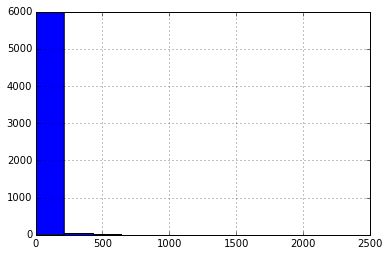

In [112]:
tag_to_id_table.id_count.hist()

In [113]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", context="talk")
rs = np.random.RandomState(7)

In [116]:
tag_to_id_table.id_count.hist(bins=1000)